In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [35]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927065
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031925
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9484016
...,...,...,...,...,...,...,...
2510,2019-12-23,1355.869995,1359.800049,1346.510010,1348.839966,1348.839966,883100
2511,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
2512,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
2513,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400


In [23]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,643.609412,648.959161,638.023361,643.645768,643.645768,3.301046e+06
std,325.191449,328.032574,322.628702,325.477628,325.477628,2.735132e+06
min,218.336624,220.314209,216.005356,217.220810,217.220810,7.922000e+03
25%,317.746506,319.858597,314.212249,316.341782,316.341782,1.427604e+06
50%,563.642517,568.708618,557.529297,562.979797,562.979797,2.334300e+06
75%,929.470001,933.679993,923.237518,929.220001,929.220001,4.444289e+06
max,1363.349976,1365.000000,1352.670044,1361.170044,1361.170044,2.976073e+07


In [32]:
data_training = data [data ['Date'] <'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927065
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031925
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9484016
...,...,...,...,...,...,...,...
2259,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
2260,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
2261,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
2262,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [31]:
data_test = data [data ['Date'] >='2019-01-01']
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2264,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2265,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2266,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2267,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
2268,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
2510,2019-12-23,1355.869995,1359.800049,1346.510010,1348.839966,1348.839966,883100
2511,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
2512,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
2513,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400


In [60]:
training_data = data_training.drop(['Date', 'Adj Close'], axis =1)
training_data.head()

,Open,High,Low,Close,Volume
0,312.304413,313.579620,310.954468,312.204773,3927065
1,312.418976,312.747742,309.609497,310.829926,6031925
2,311.761444,311.761444,302.047852,302.994293,7987226
3,303.562164,303.861053,295.218445,295.940735,12876685
4,294.894653,300.498657,293.455048,299.885956,9484016


In [73]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.0892667 , 0.08852273, 0.09191458, 0.09036546, 0.13172345],
       [0.08937553, 0.08773316, 0.0906126 , 0.08905747, 0.20246836],
       [0.0887509 , 0.08679701, 0.08329262, 0.08160283, 0.26818655],
       ...,
       [0.75884981, 0.78169582, 0.75603442, 0.78646371, 0.07064468],
       [0.78969535, 0.79277243, 0.79098066, 0.7799943 , 0.04728555],
       [0.79096828, 0.79005776, 0.78177464, 0.77859581, 0.04992395]])

In [80]:
x_train =[]
y_train =[]
training_data.shape[0]

2264

In [81]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data [i-60: i])
    y_train.append(training_data[i, 0])

In [82]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [84]:
x_train.shape, y_train.shape

((2204, 60, 5), (2204,))

In [86]:
#LSTM 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout

In [ ]:
regressior = Sequential()
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True ))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu' ))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [ ]:
regressior.summary()

In [ ]:
regressior.compile(optimizer ='Adam', loss = 'mean_squared_error')
regressior.fit(x_train, y_train, epochs = 20, batch_size = 32)

In [ ]:
#### test dataset
data_test.head()

In [ ]:
past_60_days = data_training.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis =1)
df.head()

In [ ]:
inputs = scaler.transform(df)
inputs

In [ ]:
x_test =[]
y_test =[]
for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

In [ ]:
y_pred = regressior.predict(x_test)
scaler.scale_

In [ ]:
scale = 1/1.
scale

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

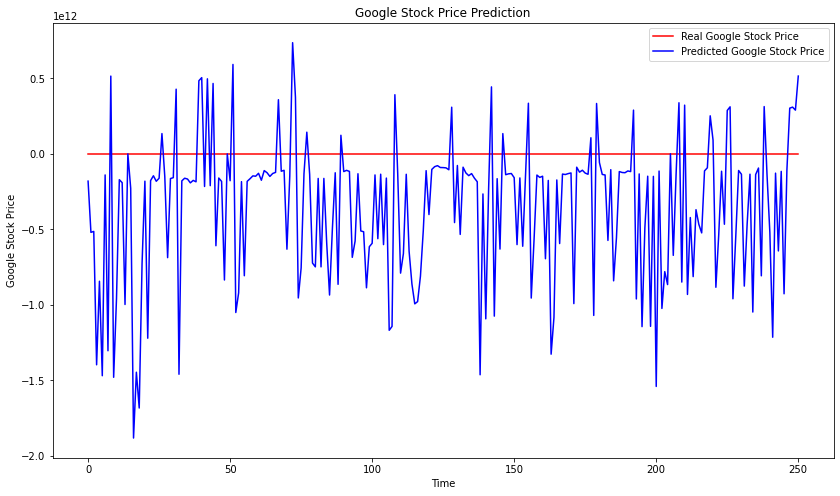

In [135]:
#可视化数据
plt.figure(figsize =(14,8))
plt.plot(y_test, color = 'red', label ='Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()